# Importing Libraries, Data

In [ ]:
# All the imports!
import tensorflow as tf
from tensorflow import keras 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
from keras.datasets import fashion_mnist    # Fashion MNIST dataset is included in Keras
from keras.utils import np_utils 
from keras import layers 
# Supress deprecation warnings
import logging
logging.getLogger('tensorflow').disabled = True

In [ ]:
# Fetch "Fashion MNIST" data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


# Map for human readable class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names_map = {i:class_names[i] for i in range(len(class_names))}


4431872/4422102 [==============================] - 0s 0us/step


# Shape of Data
We are expecting 60000 training images and 10000 test images, where each image is comprised of 28x28 greyscale pixel values.

In addition we have the classes to which each image belongs. These are held in seperate files.

In [ ]:
print("Shape of Training Image Data: " + str(x_train.shape))
print("Shape of Training Class Data: " + str(y_train.shape))
print("Shape of Test Image Data: " + str(x_test.shape))
print("Shape of Test Class Data: " + str(y_test.shape))

Shape of Training Image Data: (60000, 28, 28)
Shape of Training Class Data: (60000,)
Shape of Test Image Data: (10000, 28, 28)
Shape of Test Class Data: (10000,)


# Visualize Data
Visualizing the first 20 images


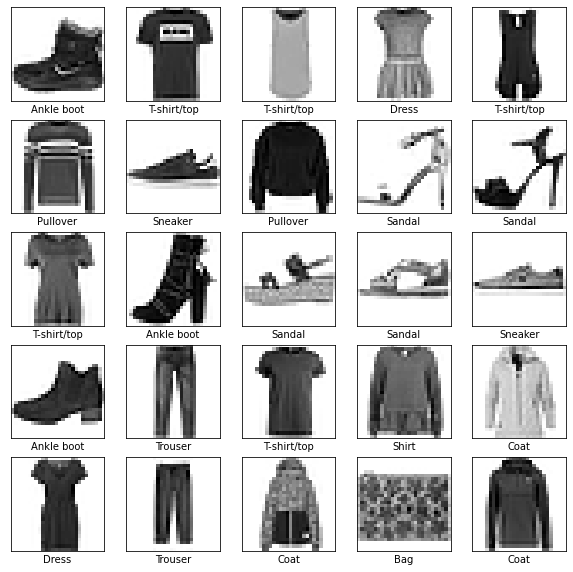

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Model 1 (Multi Layer Perceptron)
Input layer: $\large 28 \cdot 28=784$ \\
Hidden Layers: $\large 64,128,256$ \\
Final layer: 10 (Number of Classes)

In [ ]:
num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
def define_fc_model():
  model = tf.keras.models.Sequential()
  model.add(layers.Flatten(input_shape = (28,28)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10,activation="softmax"))
  return model

In [ ]:
fc_model = define_fc_model()
fc_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                50240     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 94,154
Trainable params: 94,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:
fc_model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                  metrics=['acc'])

In [ ]:
fc_model.fit(x_train, y_train,
          batch_size=64, 
          epochs=25,
          verbose=1)

Epoch 1/25
938/938 [==============================] - 4s 4ms/step - loss: 0.5520 - acc: 0.8037
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 0.3872 - acc: 0.8590
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 0.3485 - acc: 0.8730
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 0.3216 - acc: 0.8806
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.3043 - acc: 0.8879
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.2886 - acc: 0.8930
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.2755 - acc: 0.8963
Epoch 8/25
938/938 [==============================] - 4s 4ms/step - loss: 0.2650 - acc: 0.9006
Epoch 9/25
938/938 [==============================] - 4s 4ms/step - loss: 0.2558 - acc: 0.9043
Epoch 10/25
938/938 [==============================] - 4s 4ms/step - loss: 0.2445 - acc: 0.9081
Epoch 11/25
938/938 [============================

In [ ]:
predictions_fc=fc_model.predict(x_test) 
predicted_classes_fc=np.argmax(predictions_fc,axis=1)
np.save("Predicted_FM_FC.npy",predicted_classes_fc)
y_test_values = np.argmax(y_test,axis=-1) # There are in categorical form(One hot encoded) 
np.save("Y_test_values.npy",y_test_values)
print(classification_report(y_test_values, predicted_classes_fc, target_names=class_names,digits=5))

              precision    recall  f1-score   support

 T-shirt/top    0.81581   0.87700   0.84530      1000
     Trouser    0.97416   0.98000   0.97707      1000
    Pullover    0.83042   0.80800   0.81906      1000
       Dress    0.92217   0.86500   0.89267      1000
        Coat    0.77908   0.86400   0.81935      1000
      Sandal    0.95472   0.97000   0.96230      1000
       Shirt    0.76357   0.67500   0.71656      1000
     Sneaker    0.93147   0.96500   0.94794      1000
         Bag    0.96680   0.96100   0.96389      1000
  Ankle boot    0.97214   0.94200   0.95683      1000

    accuracy                        0.89070     10000
   macro avg    0.89103   0.89070   0.89010     10000
weighted avg    0.89103   0.89070   0.89010     10000



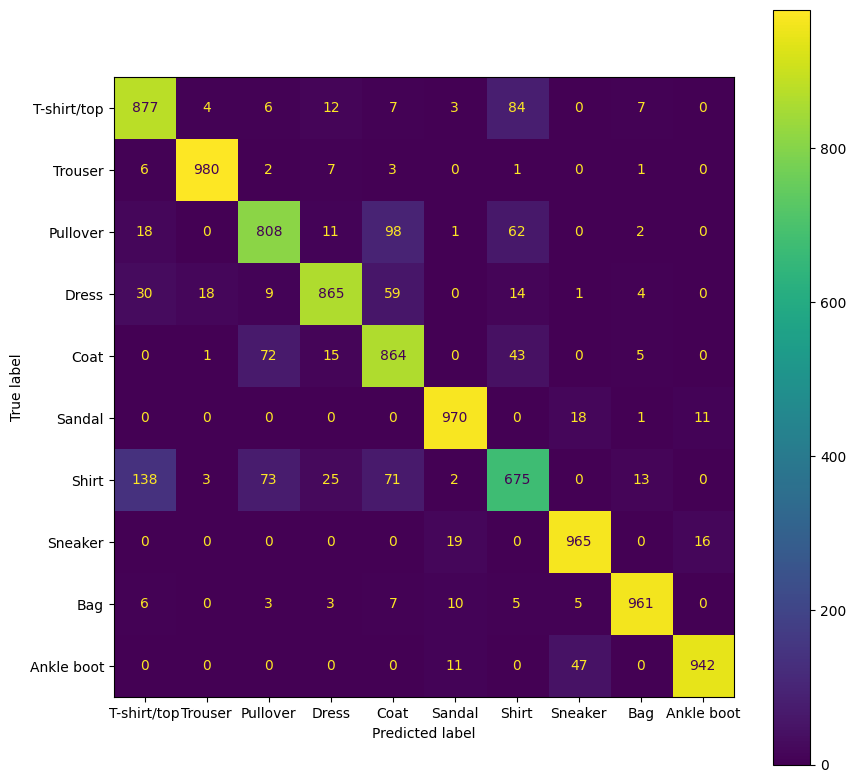

In [ ]:
y_test_names = [class_names_map[i] for i in y_test_values]
predict_names_fc = [class_names_map[i] for i in predicted_classes_fc]
fig, axs = plt.subplots(1,1,figsize=(10,10),dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test_names, predict_names_fc, labels=class_names,ax=axs)

# Model 2 (Convolutional Neural Network)
Hidden Layers 32,64 filters

In [ ]:
def define_cnn_model():
  model = tf.keras.models.Sequential()
  model.add(layers.Conv2D(32, (5, 5),activation="relu", padding="same", input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(layers.Conv2D(64, (3, 3),activation="relu", padding="same"))
  model.add(layers.MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(10,activation="softmax"))
  return model

In [ ]:
cnn_model = define_cnn_model()
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [ ]:
cnn_model.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=5e-4),
                  metrics=['acc'])

In [ ]:
cnn_model.fit(x_train, y_train,
          batch_size=64, 
          epochs=25,
          verbose=1)

Epoch 1/25
938/938 [==============================] - 8s 8ms/step - loss: 0.5538 - acc: 0.8028
Epoch 2/25
938/938 [==============================] - 7s 7ms/step - loss: 0.3675 - acc: 0.8696
Epoch 3/25
938/938 [==============================] - 7s 7ms/step - loss: 0.3220 - acc: 0.8867
Epoch 4/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2983 - acc: 0.8941
Epoch 5/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2764 - acc: 0.9015
Epoch 6/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2608 - acc: 0.9074
Epoch 7/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2459 - acc: 0.9115
Epoch 8/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2323 - acc: 0.9174
Epoch 9/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2234 - acc: 0.9198
Epoch 10/25
938/938 [==============================] - 7s 7ms/step - loss: 0.2108 - acc: 0.9248
Epoch 11/25
938/938 [============================

In [ ]:
predictions_cnn=cnn_model.predict(x_test) 
predicted_classes_cnn=np.argmax(predictions_cnn,axis=1)
y_test_values = np.argmax(y_test,axis=-1) # There are in categorical form(One hot encoded) 
print(classification_report(y_test_values, predicted_classes_cnn, target_names=class_names,digits=5))

              precision    recall  f1-score   support

 T-shirt/top    0.83207   0.87700   0.85394      1000
     Trouser    0.99796   0.97600   0.98686      1000
    Pullover    0.87289   0.87900   0.87593      1000
       Dress    0.90963   0.92600   0.91774      1000
        Coat    0.89935   0.83100   0.86383      1000
      Sandal    0.98216   0.99100   0.98656      1000
       Shirt    0.74976   0.76700   0.75828      1000
     Sneaker    0.94773   0.97900   0.96311      1000
         Bag    0.99192   0.98200   0.98693      1000
  Ankle boot    0.98548   0.95000   0.96741      1000

    accuracy                        0.91580     10000
   macro avg    0.91689   0.91580   0.91606     10000
weighted avg    0.91689   0.91580   0.91606     10000



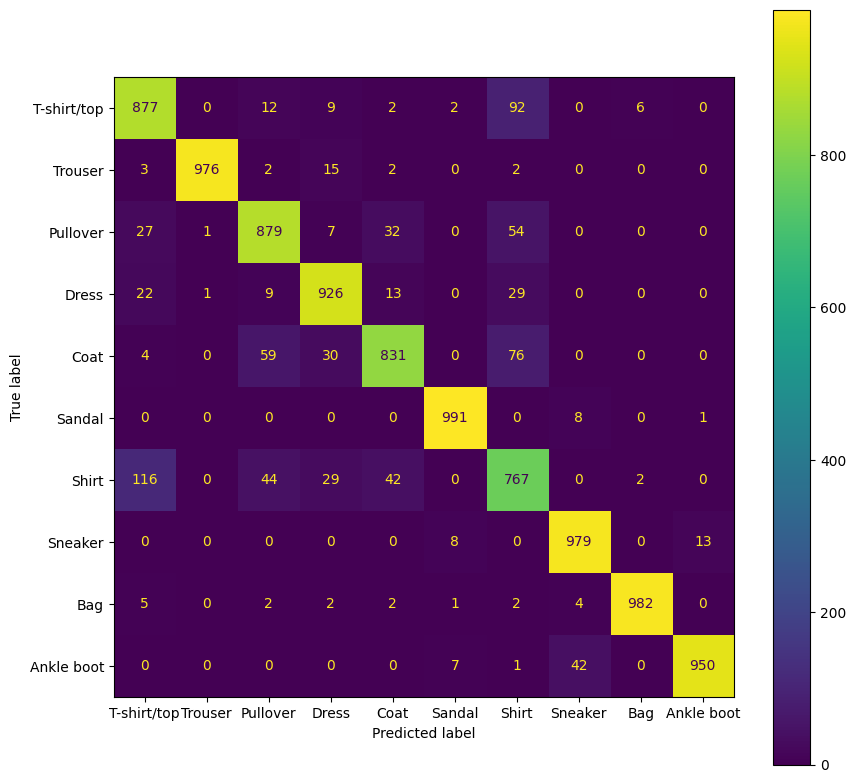

In [ ]:
predict_names_cnn = [class_names_map[i] for i in predicted_classes_cnn]
fig, axs = plt.subplots(1,1,figsize=(10,10),dpi=100)
ConfusionMatrixDisplay.from_predictions(y_test_names, predict_names_cnn, labels=class_names,ax=axs)